In [133]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
# create dataset
X, y = make_classification(n_samples = 100000, 
                           n_features=4, 
                           n_classes=2, 
                           n_informative=2, 
                           weights=[0.02, 0.98],
                           random_state=23)

In [92]:
# oversampling data
ros = RandomOverSampler(random_state=23)
X_res, y_res =ros.fit_resample(X, y)

In [127]:
# target distribution in original dataset
Counter(y)

Counter({1: 97507, 0: 2493})

In [94]:
# target distribution in overfitted dataset
Counter(y_res)

Counter({1: 97507, 0: 97507})

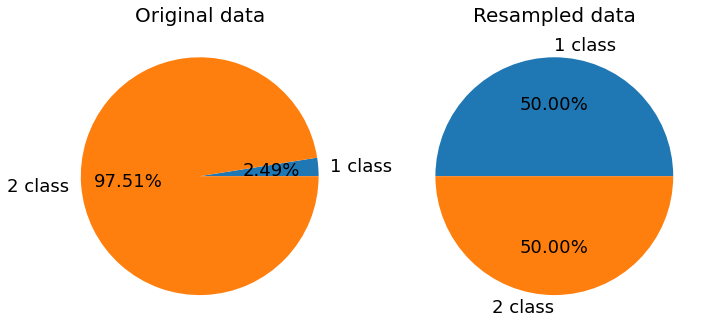

In [95]:
# create pie plots
fig, axes = plt.subplots(ncols=2, figsize=(10,7))

lab = ('1 class','2 class')
autopct='%.2f%%'
textprops={'fontsize': 18}

axes[0].set_title('Original data', fontsize=20)
axes[0].pie([Counter(y)[0],Counter(y)[1]], labels=lab, autopct=autopct, textprops=textprops)

axes[1].set_title('Resampled data', fontsize=20)
axes[1].pie([Counter(y_res)[0],Counter(y_res)[1]], labels=lab, autopct=autopct, textprops=textprops)

fig.tight_layout()
plt.show();

In [96]:
# splitting data into training and test set
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=23)
X_train_res , X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=23)

In [97]:
# build model based on original data
model = RandomForestClassifier(n_estimators=200, n_jobs=-1).fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.40      0.52       499
           1       0.98      1.00      0.99     19501

    accuracy                           0.98     20000
   macro avg       0.87      0.70      0.76     20000
weighted avg       0.98      0.98      0.98     20000



In [98]:
# build model based on resampled data
model_res = RandomForestClassifier(n_estimators=200, n_jobs=-1).fit(X_train_res, y_train_res)
y_pred_res = model_res.predict(X_test_res)
print(classification_report(y_test_res, y_pred_res))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19468
           1       1.00      0.99      0.99     19535

    accuracy                           0.99     39003
   macro avg       0.99      0.99      0.99     39003
weighted avg       0.99      0.99      0.99     39003



In [110]:
# create confusion matrix
cmatrix_res = confusion_matrix(y_test_res, y_pred_res)
cmatrix = confusion_matrix(y_test, y_pred)

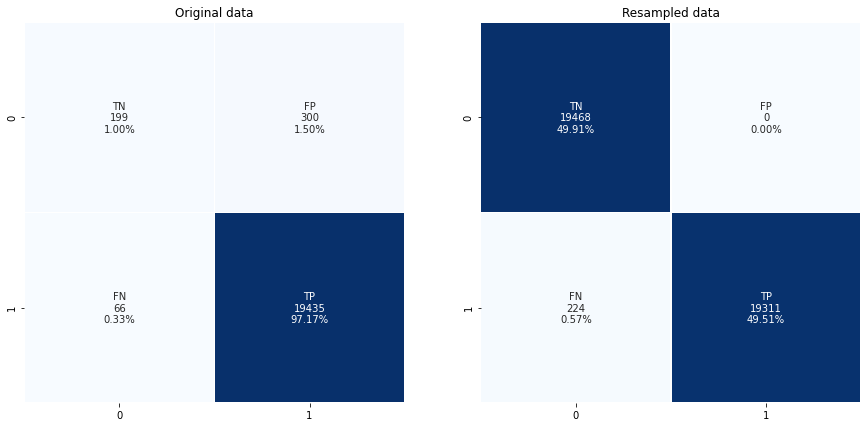

In [158]:
# confusion matrix visiualisation
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(15,7))

names = ['TN','FP','FN','TP']
counts1 = ["{0:0.0f}".format(value) for value in cmatrix.ravel()]
percent1 = ["{0:.2%}".format(value) for value in cmatrix.ravel()/cmatrix.sum()]
labels1 = [f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(names, counts1, percent1)]
labels1 = np.array(labels1).reshape(2,2)
counts2 = ["{0:0.0f}".format(value) for value in cmatrix_res.ravel()]
percent2 = ["{0:.2%}".format(value) for value in cmatrix_res.ravel()/cmatrix_res.sum()]
labels2 = [f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(names, counts2, percent2)]
labels2 = np.array(labels2).reshape(2,2)


ax1.set_title('Original data')
p1 = sns.heatmap(cmatrix_res, annot=labels2,fmt="", ax=ax2,cbar=False,linewidths=.5, cmap='Blues')
ax1.set_xlabel('Predicted label')
ax2.set_title('Resampled data')
p2 = sns.heatmap(cmatrix, annot=labels1, fmt="", ax=ax1,cbar=False,linewidths=.5,cmap='Blues')
plt.show();